# Step 1: Import Libraries and Data

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

In [ ]:
(trainX, trainY), (testX, testY) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


# Step 2: Process Data

In [ ]:
#normalization
trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX /= 255.0
testX /= 255.0

In [ ]:
trainX_noisy = trainX + 0.25 * np.random.normal(size=trainX.shape)
testX_noisy = testX + 0.25 * np.random.normal(size=testX.shape)

In [ ]:
trainX_noisy = np.clip(trainX_noisy, 0., 1.)

In [ ]:
trainX = trainX.reshape((60000, 784))
testX = testX.reshape((10000, 784))

trainX_noisy = trainX_noisy.reshape((60000, 784))
testX_noisy = testX_noisy.reshape((10000, 784))

# Step 3: Model Training

In [ ]:
INPUT_SIZE = trainX.shape[1]
CODE_SIZE = 32

# Create Model
input_img = Input(shape=(INPUT_SIZE,))  # Input Layer

encoded1 = Dense(128, activation='relu')(input_img) # 1st Hidden Layer in the Encoder's Section
encoded2 = Dense(64, activation='relu')(encoded1) # 2nd Hidden Layer in the Encoder's Section

encoded4 = Dense(CODE_SIZE, activation='relu')(encoded2) # Bottleneck

decoded1 = Dense(128, activation='relu')(encoded4) # 1st Hidden Layer in the Decoder's Section
decoded2 = Dense(256, activation='relu')(decoded1) # 2nd Hidden Layer in the Decoder's Section
decoded3 = Dense(512, activation='relu')(decoded2) # 3rd Hidden Layer in the Decoder's Section

decoded4 = Dense(INPUT_SIZE, activation='relu')(decoded3) # Output Layer

autoencoder = Model(input_img, decoded4) # AE Model
encoder = Model(input_img,encoded4) # Encoder Model

# Compile the AE Model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Fit the AE Model
autoencoder.fit(trainX_noisy, trainX, epochs=25, batch_size=256, shuffle=True, validation_split=0.2, verbose=0)

Step 4: Apply the Model

313/313 [==============================] - 2s 4ms/step


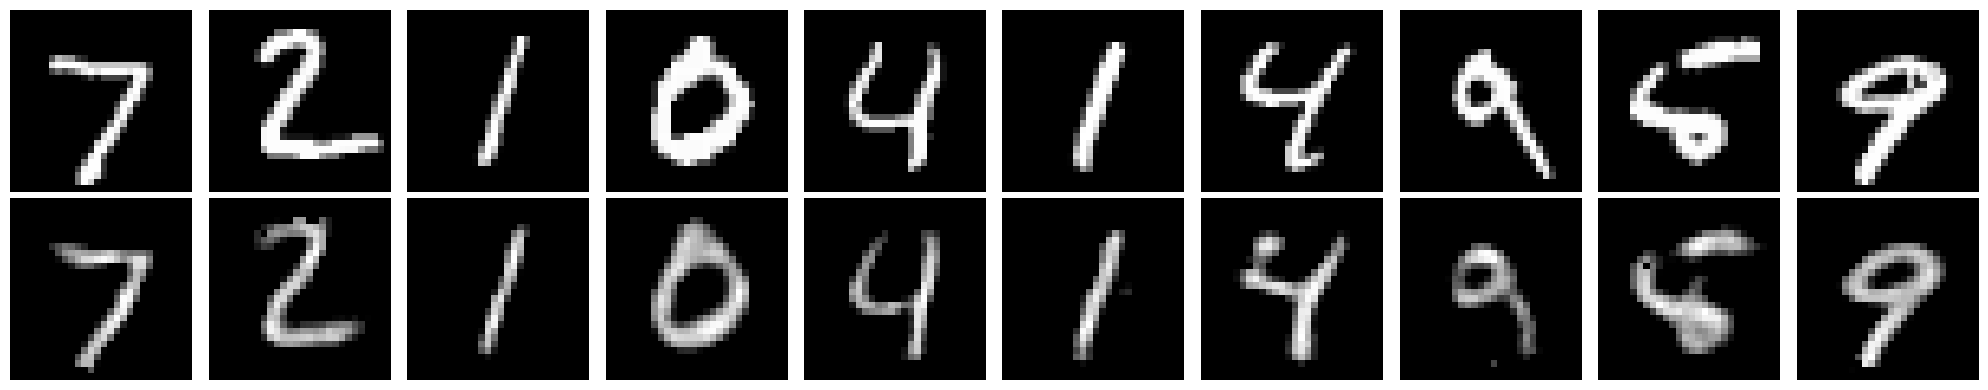

In [ ]:
reconstructed_imgs = autoencoder.predict(testX_noisy)

plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    plt.imshow(testX[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')

    # reconstruction
    plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')

plt.tight_layout()
plt.show()

The images are a little bit more clearer now.